The Play Store is the largest and most popular Android app store.
The purpose of our project was to gather and analyze detailed information on apps in the Play Store in order to provide insights on app features and the current state of the Android app market.


The dataset files:

**Play Store Data.csv:** contains all the details of the applications on Play Store. There are 13 features that describe a given app.



**Steps:**




1.   Importing libraries
2.   load the Data
4.   Cleaning the Data
5.   Top 10 Highest rating Apps
5.   Top 10 Lowest rating Apps
6.   Number of Application in terms of Category
7.   Top 10 apps which has more downloads
9.   Free and Paid Apps
8.   Relation between app category and app price
8.   Filter out under $100 apps


#**Project Name - Play Store App Analysis**#

**NAME : SUMAN RAJ**






#**Importing the libraries**#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

#**Load data**#


In [ ]:
df = pd.read_csv('/content/Dataset/Play Store Data.csv')

ad=pd.read_csv('/content/Dataset/Play Store Data.csv')

#**About Dataset**#

This file contains data on the Google Play applications. It has 10,841 rows of data with the following columns:

**App Category:** Category of the app. This could be beauty, business, entertainment, education...etc.

**Rating:** How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.

**Size:** The memory size needed to install the application.

**Installs:** The number of times each application has been installed by users.

**Type:** Whether the app is free or a paid app.

**Price:** The price of the app.

**Content Rating:** This column specifies the intended audience for the app. Can be for teens, mature audience, or everyone.

**Last Updated:** Release date of the most recent update for the app.


#**Descripton of Data**#

In [ ]:
# provides the index dtype and column dtypes, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     9476 non-null   object 
dtypes: float64(5), object(8)
memory usage: 1.2+ MB


In [ ]:
#provides a statistical summary of the numerical columns
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
#count the number of missing values in each column of a DataFrame.
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# First 5 various column in dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# last 5 rows of dataset
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


#**Cleaning the Data Frame**#
**CONVERT TO NUMERAL DATA**





**Fix the Size**

In [ ]:
# converting the size in formated
df['Size'].unique()

array([nan])

In [ ]:
# Sizes ending with 'M' are kept as they are,
#sizes ending with 'k' are divided by 1024 to convert to megabytes, and '1,000+' is replaced with 1.0.
#Any other values or errors are converted to NaN.

def fix_size(s):
  try:
    if s.endswith('M'):
      return float(s[:-1])
    elif s.endswith('k'):
      return (float(s[:-1]) / 1024)
    elif s == '1,000+':
      return 1.0
    else:
      return np.nan
  except:
      return np.nan

In [ ]:
fix_size('98M')

98.0

1 mb =1024kb

In [ ]:
fix_size('45k')

0.0439453125

**Ratings of app**

In [ ]:
# Find the index of the row with the highest rating
max_rating_index = df['Rating'].idxmax()

# Get the app name corresponding to the index
app_name_highest_rating = df.loc[max_rating_index, 'App']

# Get the highest rating
highest_rating = df.loc[max_rating_index, 'Rating']

print("App with the highest rating:", app_name_highest_rating)
print("Highest rating:", highest_rating)

App with the highest rating: Hojiboy Tojiboyev Life Hacks
Highest rating: 5.0


In [ ]:
# Find the index of the row with the lowest rating
min_rating_index = df['Rating'].idxmin()

# Get the app name corresponding to the lowest rating
app_with_lowest_rating = df.loc[min_rating_index, 'App']
lowest_rating = df.loc[min_rating_index, 'Rating']

print("App with the lowest rating:", app_with_lowest_rating)
print("Lowest rating:", lowest_rating)

App with the lowest rating: House party - live chat
Lowest rating: 1.0


#**Installed APP**#

In [ ]:
df['Category'].unique()

array(['Art_And_Design', 'Auto_And_Vehicles', 'Beauty',
       'Books_And_Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food_And_Drink', 'Health_And_Fitness', 'House_And_Home',
       'Libraries_And_Demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel_And_Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video_Players', 'News_And_Magazines', 'Maps_And_Navigation'],
      dtype=object)

In [ ]:
install_per_category = df.groupby('Category')['Installs'].sum().reset_index()

print(install_per_category)

               Category      Installs
0        Art_And_Design  1.243381e+08
1     Auto_And_Vehicles  5.313021e+07
2                Beauty  2.719705e+07
3   Books_And_Reference  1.921470e+09
4              Business  1.001915e+09
5                Comics  5.608615e+07
6         Communication  3.264728e+10
7                Dating  2.643108e+08
8             Education  8.714520e+08
9         Entertainment  2.869160e+09
10               Events  1.597316e+07
11               Family  1.025826e+10
12              Finance  8.766487e+08
13       Food_And_Drink  2.738988e+08
14                 Game  3.508602e+10
15   Health_And_Fitness  1.583073e+09
16       House_And_Home  1.687125e+08
17   Libraries_And_Demo  6.299591e+07
18            Lifestyle  5.376435e+08
19  Maps_And_Navigation  7.242819e+08
20              Medical  5.325744e+07
21   News_And_Magazines  7.496318e+09
22            Parenting  3.152111e+07
23      Personalization  2.325495e+09
24          Photography  1.008825e+10
25         P

#**Top 10 Highest rating Apps in play store in terms of categories**#

In [ ]:
cp=df.sort_values(['Rating'],ascending=False)
Highest_Rating_App= cp.loc[:,['App','Category','Rating']]
Highest_Rating_App.head(11)

,App,Category,Rating
9056,Santa's Monster Shootout DX,Game,5.0
8395,DG TV,News_And_Magazines,5.0
8493,PK and DK Audio App,Family,5.0
6330,HON. B.J. ACS COLLEGE ALE,Family,5.0
6342,BJ Foods,Business,5.0
6363,Read it easy for BK,Lifestyle,5.0
9766,ER Assist,Productivity,5.0
6364,BK Video Status,Family,5.0
6372,BK Formula Calculator,Tools,5.0
6375,Dr Bk Sachin bhai,Lifestyle,5.0


#**Top 10 Lowest rating Apps in play store in terms of categories**#

In [ ]:
# Sort the DataFrame by 'Rating' in ascending order
sorted_by_rating = df.sort_values('Rating')

# Group by 'Category' and get the top 10 apps within each category
top_10_lowest_rated_per_category = sorted_by_rating.groupby('Category').head(10)

# Display the result
print(top_10_lowest_rated_per_category[['Category', 'App', 'Rating']])

        Category                                               App  Rating
8820       Tools                                    DS Creator 2.0     1.0
7144     Finance                                     CB Mobile Biz     1.0
10400    Medical           Familial Hypercholesterolaemia Handbook     1.0
10591      Tools  Lottery Ticket Checker - Florida Results & Lotto     1.0
5151     Medical                                     Clarksburg AH     1.0
...          ...                                               ...     ...
778    Education                         GRE® Flashcards by Kaplan     4.0
775    Education                                   Pocket SAT Math     4.0
830    Education         Mango Languages: Lovable Language Courses     4.0
6576      Events                                       Bo Aung Din     4.1
1015      Events                                         Name days     4.1

[330 rows x 3 columns]


#**Number of Application in terms of Category**#

<ipython-input-124-1d53a91c869d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette=category_colors)


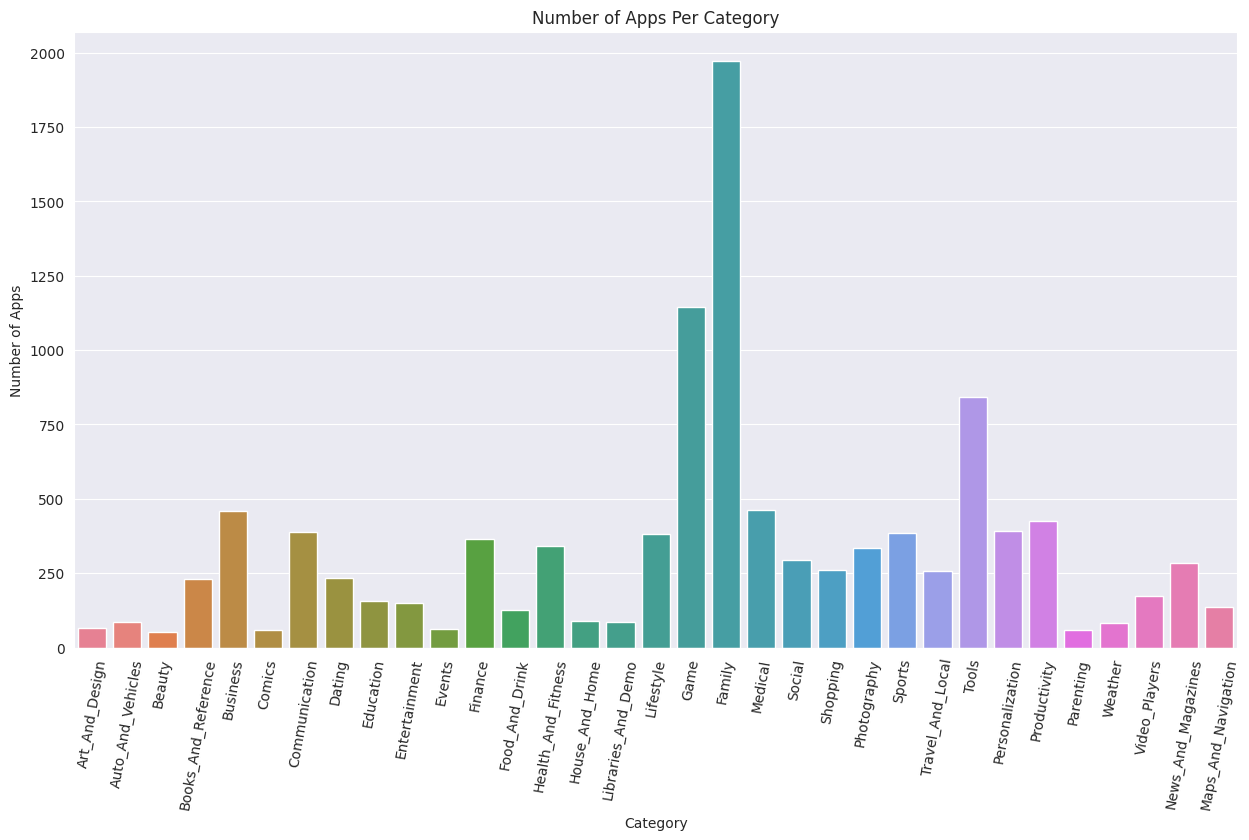

In [ ]:
sns.set_style('darkgrid')

# Set the figure size
plt.figure(figsize=(15, 8))

# Define a color palette for each category
category_colors = sns.color_palette('husl', n_colors=len(df['Category'].unique()))

# Create the countplot with different colors for each category
sns.countplot(x='Category', data=df, palette=category_colors)

# Set title and labels
plt.title('Number of Apps Per Category')
plt.xticks(rotation=80)  # Rotate x-axis labels for better readability
plt.ylabel('Number of Apps')

# Show the plot
plt.show()

In [ ]:
# Count the number of apps in each category
app_count_per_category = df['Category'].value_counts()

# Display the result
print(app_count_per_category)

Category
Family                 1972
Game                   1144
Tools                   843
Medical                 463
Business                460
Productivity            424
Personalization         392
Communication           387
Sports                  384
Lifestyle               382
Finance                 366
Health_And_Fitness      341
Photography             335
Social                  295
News_And_Magazines      283
Shopping                260
Travel_And_Local        258
Dating                  234
Books_And_Reference     231
Video_Players           175
Education               156
Entertainment           149
Maps_And_Navigation     137
Food_And_Drink          127
House_And_Home           88
Auto_And_Vehicles        85
Libraries_And_Demo       85
Weather                  82
Art_And_Design           65
Events                   64
Parenting                60
Comics                   60
Beauty                   53
Name: count, dtype: int64


#**Top 10 apps which  has more downloads**#

In [ ]:
bm = df.sort_values('Installs',ascending=False)
More_downloads_App= bm.loc[:,['App','Installs']]
More_downloads_App.head(11)

,App,Installs
3896,Subway Surfers,1.000000e+09
3943,Facebook,1.000000e+09
335,Messenger – Text and Video Chat for Free,1.000000e+09
3523,Google Drive,1.000000e+09
3565,Google Drive,1.000000e+09
2884,Google Photos,1.000000e+09
3665,YouTube,1.000000e+09
2853,Google Photos,1.000000e+09
4234,Skype - free IM & video calls,1.000000e+09
3687,Google Play Movies & TV,1.000000e+09


**lowest rating**

In [ ]:
ab = df[df['Category'] == 'Family']
bv = ab.sort_values(by=['Rating'], ascending=True)

Family_lowest_rating= bv.loc[:,['Category','Rating']]
Family_lowest_rating.head(11)


,Category,Rating
5978,Family,1.0
10324,Family,1.0
4127,Family,1.0
4905,Family,1.6
6135,Family,1.7
9176,Family,1.7
6812,Family,1.8
4904,Family,1.8
9890,Family,1.9
7416,Family,1.9


**Highest rating**

In [ ]:
hi = df[df['Category'] == 'Family']
hig = hi.sort_values(by=['Rating'], ascending=False)

Family_highest_rating = hig.loc[:,['Category','Rating']]
Family_highest_rating.head(11)

,Category,Rating
10837,Family,5.0
9531,Family,5.0
7320,Family,5.0
7307,Family,5.0
7239,Family,5.0
5246,Family,5.0
9496,Family,5.0
9503,Family,5.0
7212,Family,5.0
7204,Family,5.0


#**FREE AND PAID APPS**#

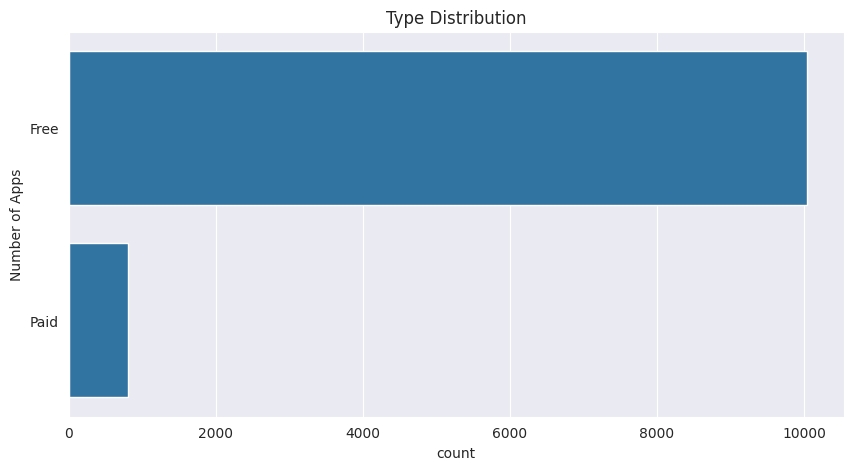

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(df['Type'])
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.show()

#**Relation between app category and app price**#

<ipython-input-52-ea4d4a53319c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Category', data=avg_prices, ax=ax, palette='viridis')


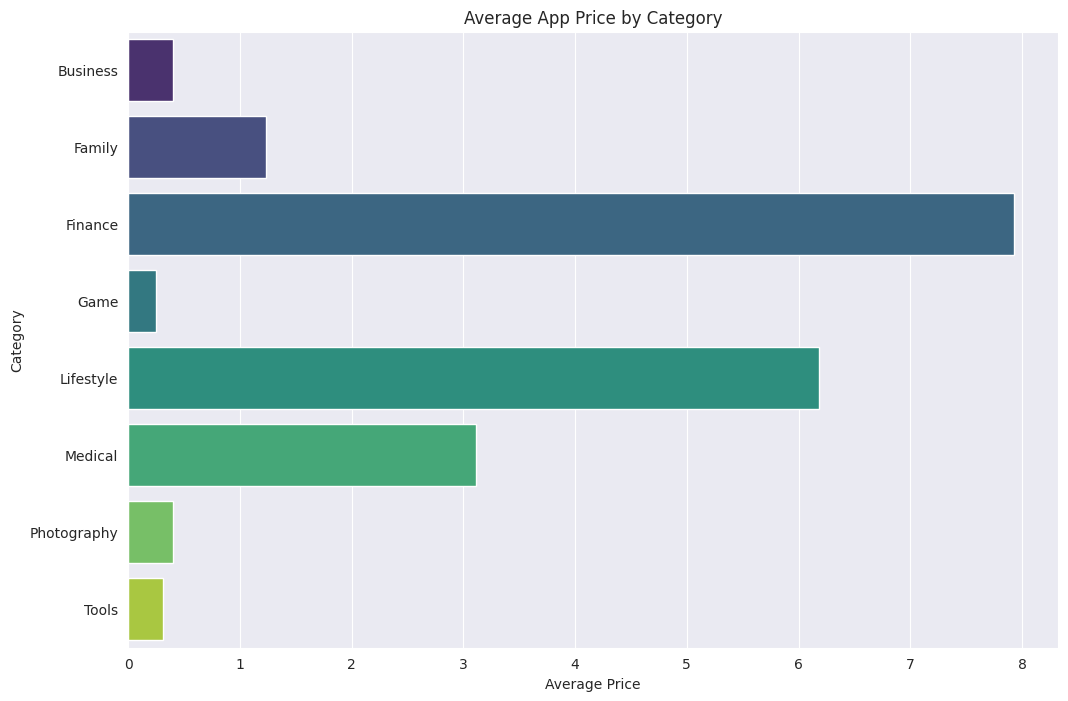

In [ ]:
popular_app_cats = df[df.Category.isin(['Game', 'Family', 'Photography',
                                        'Medical', 'Tools', 'Finance',
                                        'Lifestyle', 'Business'])]

# Calculate average price for each category
avg_prices = popular_app_cats.groupby('Category')['Price'].mean().reset_index()

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='Price', y='Category', data=avg_prices, ax=ax, palette='viridis')

# Setting title and labels
ax.set_title('Average App Price by Category')
ax.set_xlabel('Average Price')
ax.set_ylabel('Category')

# Display the plot
plt.show()

#**Filter out under "$100" apps**#

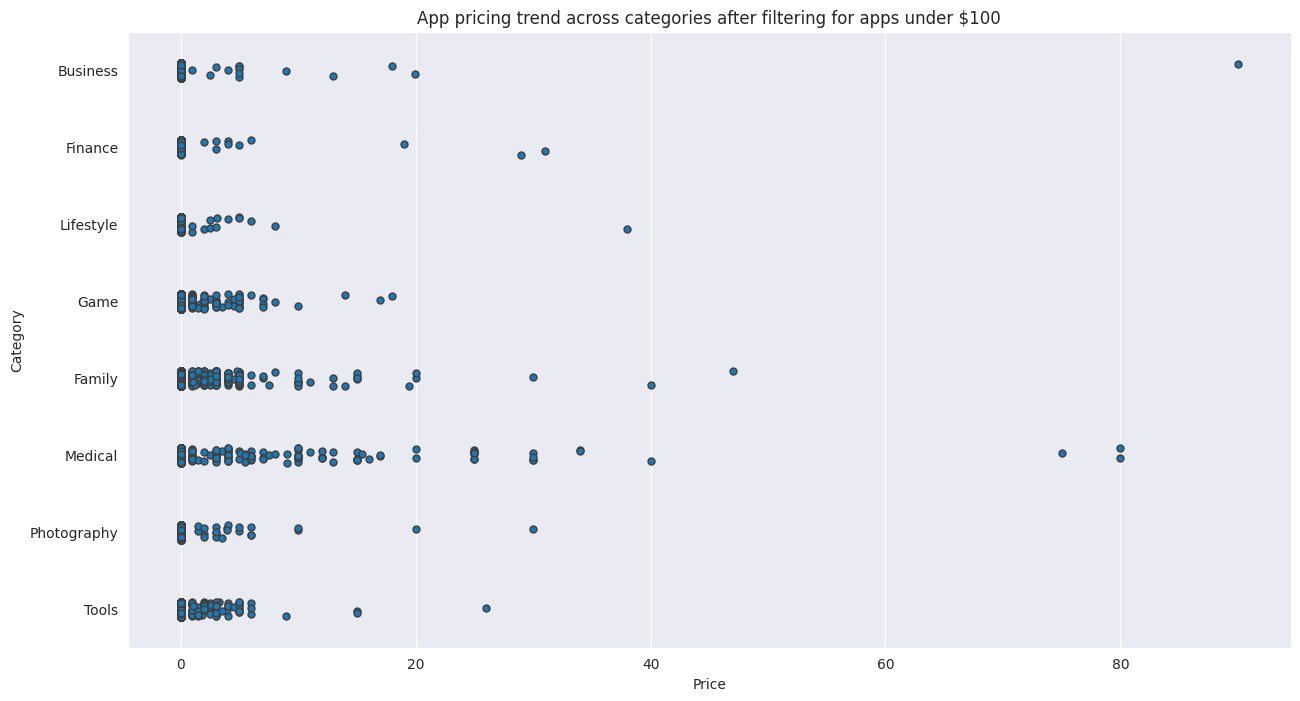

In [ ]:
apps_under_100 = popular_app_cats[popular_app_cats["Price"] < 100]

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(15, 8))

# Create the strip plot
sns.stripplot(x="Price", y="Category", data=apps_under_100, jitter=True, linewidth=1)

# Setting title and labels
ax.set_title('App pricing trend across categories after filtering for apps under $100')
ax.set_xlabel('Price')
ax.set_ylabel('Category')

# Display the plot
plt.show()

#**Solution of Business Objective**#

As per the above analysis FAMILY category has very much scope because it has all age group people. second category is GAME that has also scope.



Eventhough apps from the categories like FAMILY, SOCIAL, COMMUNICATION and ENTERTAINMENT of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store (which are mostly from FINANCE and LIFESTYLE). As a conclsuion, we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps.

#**Conclusion**#

After analyzing the dataset we have got answers to some of the serious & interesting facts which any of the android users would love to know.

a) Top 10 Highest rating Apps in google play store in terms of categories

b) Number of Application in terms of Category

c) Top 10 apps which has more downloads

d) Which 10 apps from the 'FAMILY' category are having the lowest rating and highest rating.

e) Free and Paid Apps

f) Relation between app category and app price


The Google Play Store Apps report provides some useful insights regarding the trending of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. There are some spikes in term of size and price but it shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority. Futhermore, most of the apps that are having high amount of reviews are from the categories of SOCIAL and GAME like Instagram, Clash of Clans etc.


